# Happiness - Assignment 1
```
James Ambat
Assignment 1
CS-663
```

# My Setup

From the terminal, create and activate the virtual environment:
```
cd happiness-jaambat
mkdir venv
python3 -m venv ./venv
source venv/bin/activate
```

I used PyCharm IDE for development and linked the interpreter with the following steps:
```
Pycharm -> Settings -> Project: happiness-jaambat
Python Interpretter -> Add Interpretter
Add Local Interpretter -> /happiness-jaambat/venv
```

From the terminal, install the required libraries:
```
pip install -r requirements.txt
```

### __Import the libraries for use in the assignment__

In [1]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# Question 1
## The following questions will be addressed in separate headers and cells:
1.1 What is your evaluation of the quality of the data?
1.2 How large is the dataset?
1.3 What are the features (columns) and how are they represented?
1.4 Are there any interesting distributions in the (numeric) features?
1.5 Are there any interesting correlations in the data?
1.6 Can you identify any limitations, missing values or distortions of the data?
1.7 What would you like to see in this dataset?

#### Read in the data so that it can be analyzed
From the routine below, there is only one sheet named **Sheet1**

In [2]:
whr_file = "./DataForTable2.1WHR2023.xls"
whr_data_frame = pd.ExcelFile(whr_file)
sheet_names = whr_data_frame.sheet_names
print(f"The sheets in the excel file: {str(sheet_names)}")
print(f"Number of sheets in the excel file {len(sheet_names)}")

The sheets in the excel file: ['Sheet1']
Number of sheets in the excel file 1


#### The single sheet is read-in:

In [3]:
sheet_name = sheet_names[0]
whr_data_frame = pd.read_excel(io=whr_file, sheet_name=sheet_name)

## 1.1 What is your evaluation of the quality of the data?
* To evaluate the data, it is necessary to inspect relevant information such as occurrences, mean, standard deviation, min, max, and distribution.
  * The routines used to acquire this data are outlined in the cells **below** this header of responses. See header **1.1 Calculations**.
* 1.1.a - For **numerical** data, I evaluate the data for the presence of outliers in box plots.
  * See 1.1.a Boxplot
  * See 1.1.a Outlier Calculations. Below is a table showing the number of outliers for each **numerical** feature:
```
-----------------------------------------------------------------------------
A summary of the outliers from each of the features
-------------------------------------------------------------------------------

	 * year                               :   Num Outliers:  0
	 * Life Ladder                        :   Num Outliers:  1
	 * Log GDP per capita                 :   Num Outliers:  3
	 * Social support                     :   Num Outliers:  56
	 * Healthy life expectancy at birth   :   Num Outliers:  32
	 * Freedom to make life choices       :   Num Outliers:  100
	 * Generosity                         :   Num Outliers:  36
	 * Perceptions of corruption          :   Num Outliers:  194
	 * Positive affect                    :   Num Outliers:  7
	 * Negative affect                    :   Num Outliers:  36
```
* 1.1.b - While we can inspect a range index of **2199** rows in the data frame, **Country Name, year, and Life Ladder** are the only features that have non-null values that match the quantities of the entire index range. The rest of the features are missing some entries.
  * For example, perceptions of corruption is actually missing (116) entries which represents ~5.2% of missing data.
  * Below is a table showing the degree of missing data.
```
----------------------------------------------
  Features and their missing values
----------------------------------------------

year                                ||   Num Missing:  0.00   || Percent Missing:  0.00
Life Ladder                         ||   Num Missing:  0.00   || Percent Missing:  0.00
Log GDP per capita                  ||   Num Missing:  20.00  || Percent Missing:  0.91
Social support                      ||   Num Missing:  13.00  || Percent Missing:  0.59
Healthy life expectancy at birth    ||   Num Missing:  54.00  || Percent Missing:  2.46
Freedom to make life choices        ||   Num Missing:  33.00  || Percent Missing:  1.50
Generosity                          ||   Num Missing:  73.00  || Percent Missing:  3.32
Perceptions of corruption           ||   Num Missing:  116.00 || Percent Missing:  5.28
Positive affect                     ||   Num Missing:  24.00  || Percent Missing:  1.09
Negative affect                     ||   Num Missing:  16.00  || Percent Missing:  0.73
```
* 1.1.c - At this point in the evaluation, I use the dataframe's describe() info and calculation of the `std < mean + min`, to see if there may be any erroneous data from just this calculation.
  * **These will be later evaluated with bar charts, skewness, and kurtosis evaluations in Question 1.4.**
    * See __Question 1.4 - interesting distributions in the (numeric) features__
  * **year** - Its **standard deviation** is less than its `mean + min value`
  * **Life Ladder** - Its **standard deviation** is less than its `mean + min value`
  * **Log GDP per capita** - Its **standard deviation** is less than its `mean + min value`
  * **Social support** - Its **standard deviation** is less than its `mean + min value`
  * **Healthy life expectancy at birth** - Its **standard deviation** is less than its `mean + min value`
  * **Freedom to make life choices** - Its **standard deviation** is less than its `mean + min value`
  * **Generosity** - Its standard deviation is **greater** than its `mean + min value`
  * **Perception of corruption** - Its **standard deviation** is less than its `mean + min value`
  * **Positive affect** - Its **standard deviation** is less than its `mean + min value`
  * **Negative affect** - Its **standard deviation** is less than its `mean + min value`
* 1.1.d - `std < mean + min` calculations are tabulated below and the calculations are outlined in the **1.1 Calculations**:
```
                                                                    std < mean + min?
year            || Std: 4.719 || Mean: 2014.161 || Min: 2005.000 || ( True )
Life Ladder     || Std: 1.126 || Mean:    5.479 || Min:    1.281 || ( True )
Log GDP pe...   || Std: 1.153 || Mean:    9.390 || Min:    5.527 || ( True )
Social sup...   || Std: 0.121 || Mean:    0.811 || Min:    0.228 || ( True )
Healthy li...   || Std: 6.901 || Mean:   63.295 || Min:    6.720 || ( True )
Freedom to...   || Std: 0.140 || Mean:    0.748 || Min:    0.258 || ( True )
Generosity      || Std: 0.161 || Mean:    0.000 || Min:   -0.338 || ( False )
Perception...   || Std: 0.186 || Mean:    0.745 || Min:    0.035 || ( True )
Positive a...   || Std: 0.106 || Mean:    0.652 || Min:    0.179 || ( True )
Negative a...   || Std: 0.087 || Mean:    0.272 || Min:    0.083 || ( True )
```

## The following notes on quality have been taken:
* The data is missing entries and is not entirely complete.
* As reported in the **Statistical Appendix 1 for Chapter 2**, the `Healthy Life Expectancy at Birth` feature has extrapolated and interpolated data (not real data).
* We assume `generosity` has a range from -1 to 1, but this is not certain or documented in the **World Happiness Report** webpage or the report's **Statistical Appendix 1 for Chapter 2**.
* **Generosity's** standard deviation is **greater** than its `mean + min value`
* The data has notable outliers.

#### 1.1 Calculations

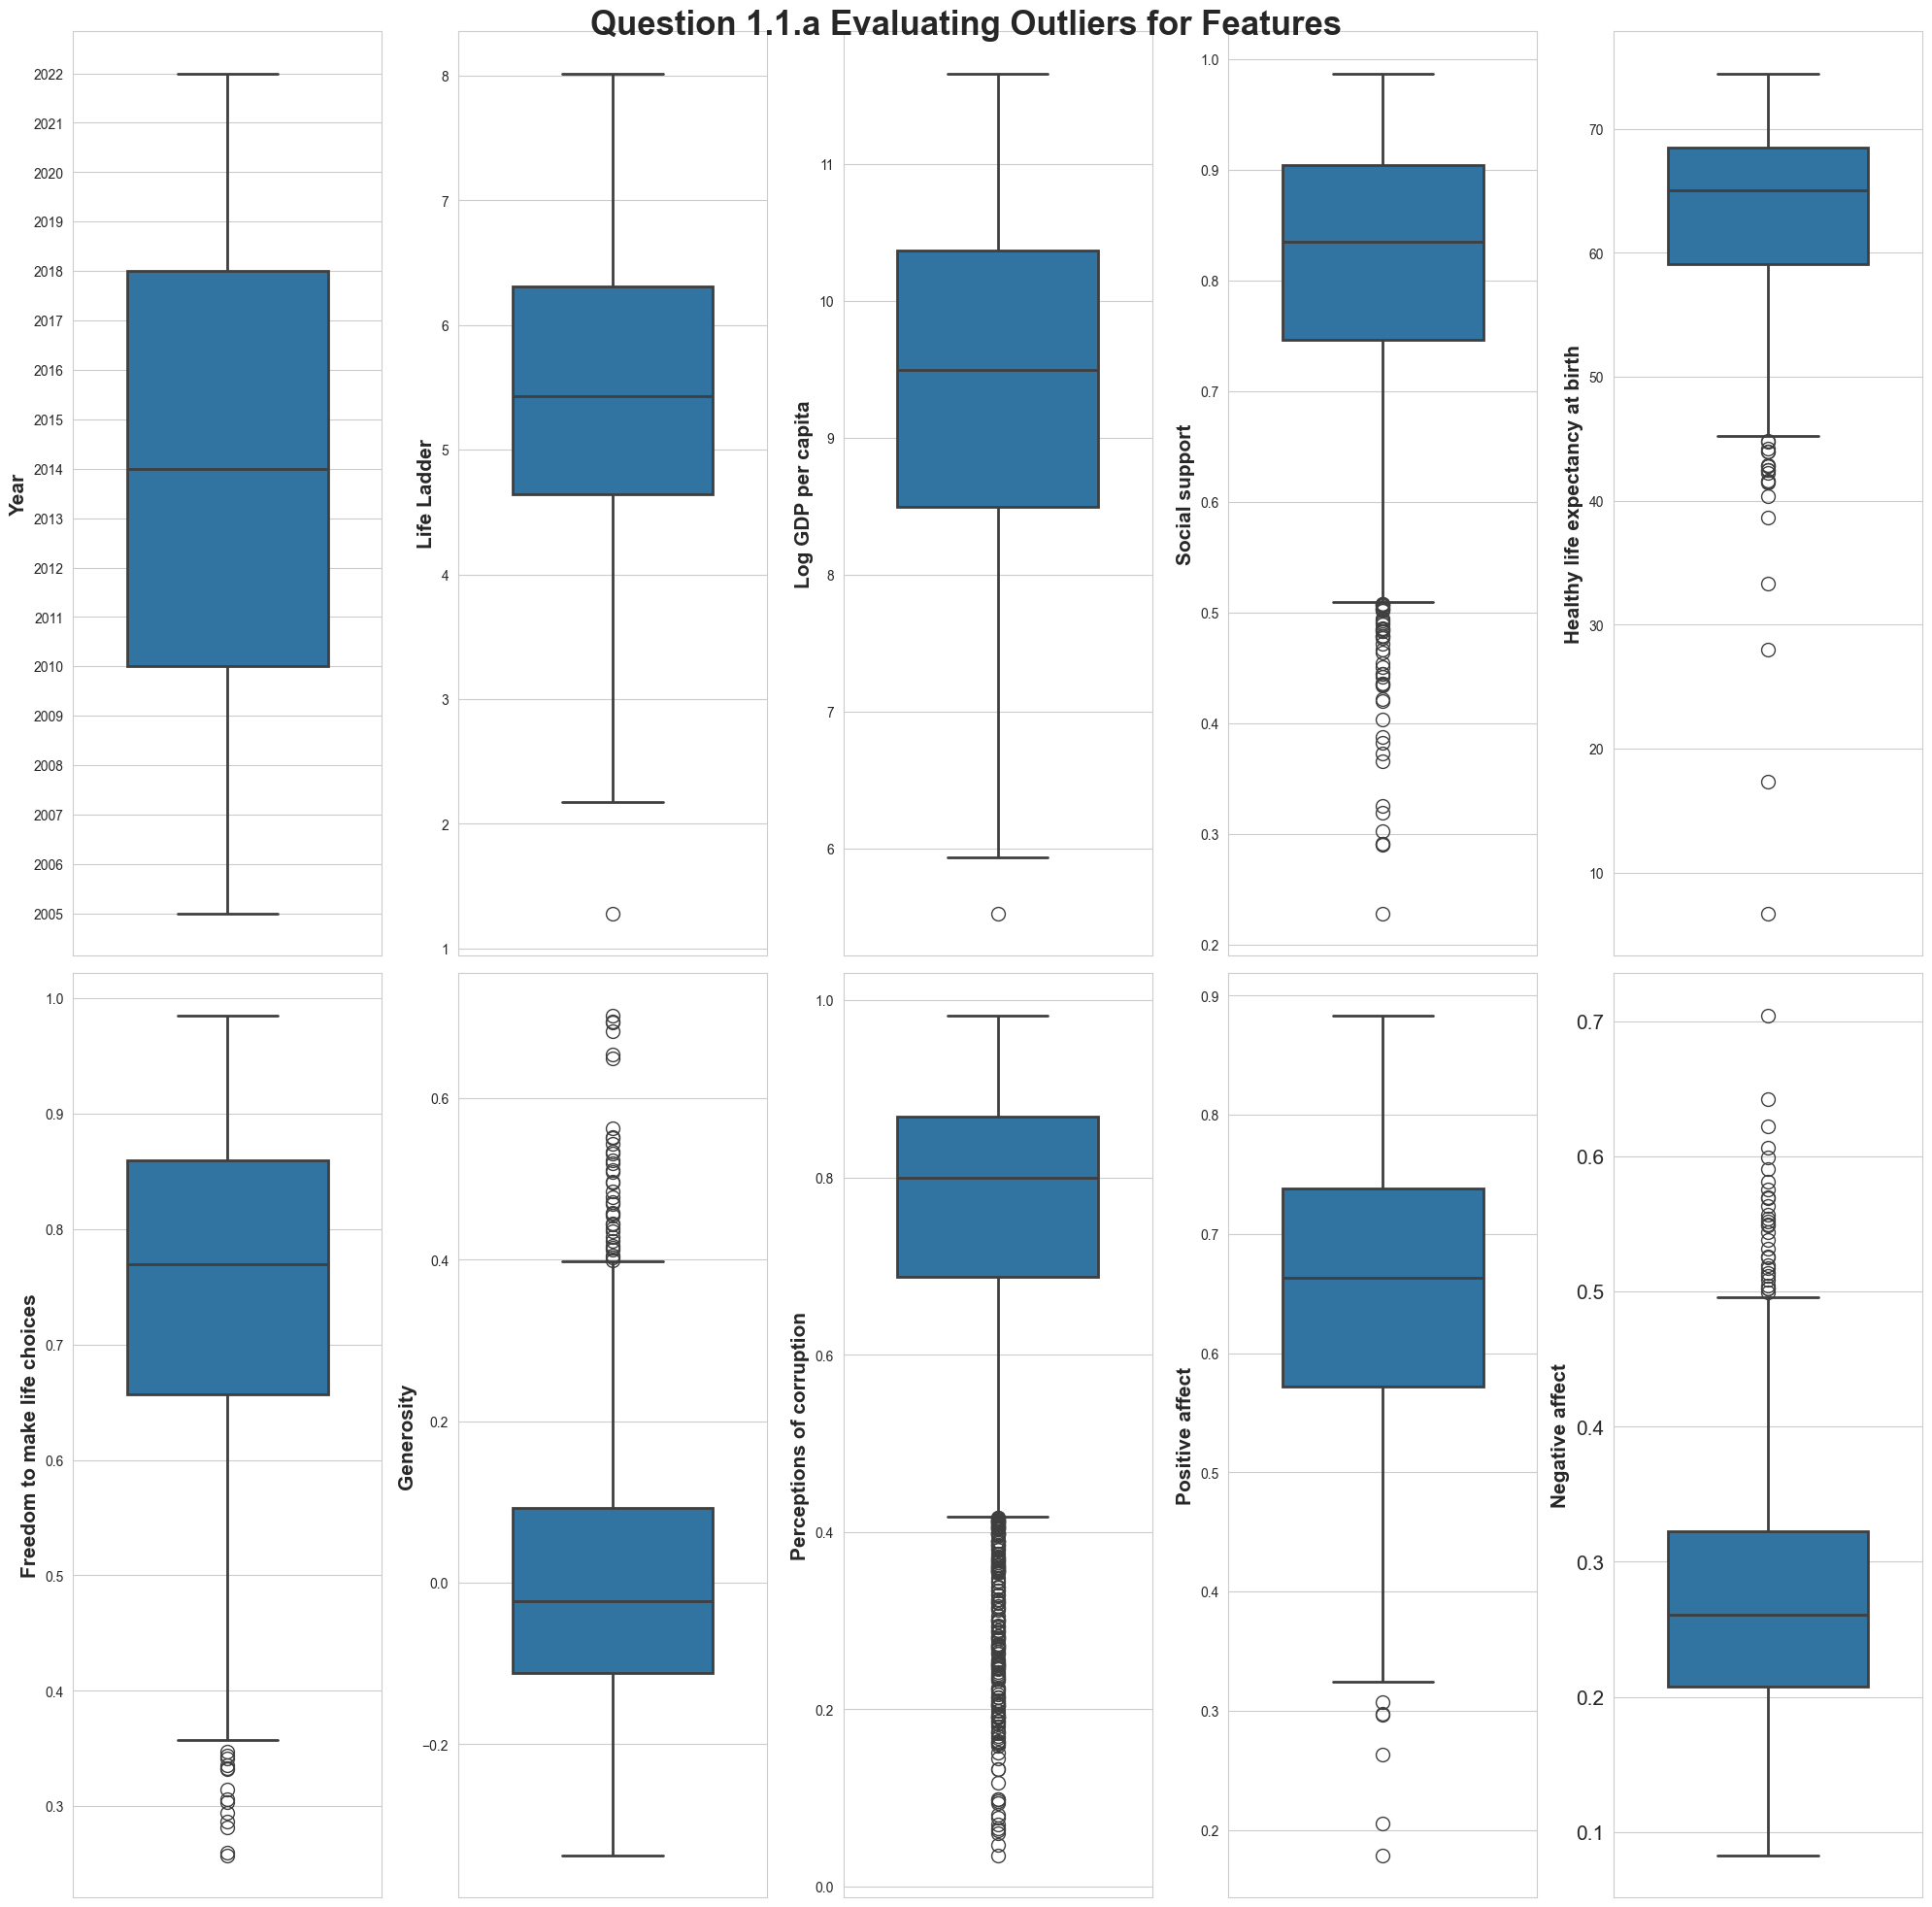

In [4]:
# 1.1.a Box plots to evaluate outliers.
figure, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 20))  # since we have 10 features
figure.suptitle("Question 1.1.a Evaluating Outliers for Features",
          fontsize=25,
          fontweight="bold")

plt.tick_params(labelsize=15)

box_plot_axis = sns.boxplot(data=whr_data_frame["year"], width=0.65, ax=axes[0, 0], linewidth=2.0, fliersize=10)
axes[0, 0].set_ylabel("Year", fontweight="bold", fontsize=15)
axes[0, 0].set_yticks(range(2005, 2023))

sns.boxplot(data=whr_data_frame["Life Ladder"], width=0.65, ax=axes[0, 1], linewidth=2.0, fliersize=10)
axes[0, 1].set_ylabel("Life Ladder", fontweight="bold", fontsize=15)

sns.boxplot(data=whr_data_frame["Log GDP per capita"], width=0.65, ax=axes[0, 2], linewidth=2.0, fliersize=10)
axes[0, 2].set_ylabel("Log GDP per capita", fontweight="bold", fontsize=15)

sns.boxplot(data=whr_data_frame["Social support"], width=0.65, ax=axes[0, 3], linewidth=2.0, fliersize=10)
axes[0, 3].set_ylabel("Social support", fontweight="bold", fontsize=15)

sns.boxplot(data=whr_data_frame["Healthy life expectancy at birth"], width=0.65, ax=axes[0, 4], linewidth=2.0, fliersize=10)
axes[0, 4].set_ylabel("Healthy life expectancy at birth", fontweight="bold", fontsize=15)

sns.boxplot(data=whr_data_frame["Freedom to make life choices"], width=0.65, ax=axes[1, 0], linewidth=2.0, fliersize=10)
axes[1, 0].set_ylabel("Freedom to make life choices", fontweight="bold", fontsize=15)

sns.boxplot(data=whr_data_frame["Generosity"], width=0.65, ax=axes[1, 1], linewidth=2.0, fliersize=10)
axes[1, 1].set_ylabel("Generosity", fontweight="bold", fontsize=15)

sns.boxplot(data=whr_data_frame["Perceptions of corruption"], width=0.65, ax=axes[1, 2], linewidth=2.0, fliersize=10)
axes[1, 2].set_ylabel("Perceptions of corruption", fontweight="bold", fontsize=15)

sns.boxplot(data=whr_data_frame["Positive affect"], width=0.65, ax=axes[1, 3], linewidth=2.0, fliersize=10)
axes[1, 3].set_ylabel("Positive affect", fontweight="bold", fontsize=15)

sns.boxplot(data=whr_data_frame["Negative affect"], width=0.65, ax=axes[1, 4], linewidth=2.0, fliersize=10)
axes[1, 4].set_ylabel("Negative affect", fontweight="bold", fontsize=15)

plt.tight_layout()
plt.show()


In [5]:
# 1.1.a - Tabulated data for outliers.
print("\n-----------------------------------------------------------------------------\n"
      "A summary of the outliers from each of the features                            \n"
      "-------------------------------------------------------------------------------\n")
# Year does not have any outliers.
feature = "year"
try:
    num_outliers = len(whr_data_frame[whr_data_frame[feature] < 2][feature].value_counts().values)
    print("\t * %-35s:   Num Outliers:  %d" % (feature, num_outliers))
except (Exception, ) as e:
        print("\t * %-35s:   Num Outliers:  %d" % (feature, 0))


feature = "Life Ladder"
num_outliers = len(whr_data_frame[whr_data_frame[feature] < 2][feature].value_counts().values)
print("\t * %-35s:   Num Outliers:  %d" % (feature, num_outliers))

feature = "Log GDP per capita"
num_outliers = len(whr_data_frame[whr_data_frame[feature] < 6][feature].value_counts().values)
print("\t * %-35s:   Num Outliers:  %d" % (feature, num_outliers))

feature = "Social support"
num_outliers = len(whr_data_frame[whr_data_frame[feature] < 0.52][feature].value_counts().values)
print("\t * %-35s:   Num Outliers:  %d" % (feature, num_outliers))

feature = "Healthy life expectancy at birth"
num_outliers = len(whr_data_frame[whr_data_frame[feature] < 47][feature].value_counts().values)
print("\t * %-35s:   Num Outliers:  %d" % (feature, num_outliers))

feature = "Freedom to make life choices"
num_outliers = len(whr_data_frame[whr_data_frame[feature] < 0.47][feature].value_counts().values)
print("\t * %-35s:   Num Outliers:  %d" % (feature, num_outliers))

feature = "Generosity"
num_outliers = len(whr_data_frame[whr_data_frame[feature] > 0.4][feature].value_counts().values)
print("\t * %-35s:   Num Outliers:  %d" % (feature, num_outliers))

feature = "Perceptions of corruption"
num_outliers = len(whr_data_frame[whr_data_frame[feature] < 0.43][feature].value_counts().values)
print("\t * %-35s:   Num Outliers:  %d" % (feature, num_outliers))

feature = "Positive affect"
num_outliers = len(whr_data_frame[whr_data_frame[feature] < 0.33][feature].value_counts().values)
print("\t * %-35s:   Num Outliers:  %d" % (feature, num_outliers))

feature = "Negative affect"
num_outliers = len(whr_data_frame[whr_data_frame[feature] > 0.49][feature].value_counts().values)
print("\t * %-35s:   Num Outliers:  %d" % (feature, num_outliers))


-----------------------------------------------------------------------------
A summary of the outliers from each of the features                            
-------------------------------------------------------------------------------

	 * year                               :   Num Outliers:  0
	 * Life Ladder                        :   Num Outliers:  1
	 * Log GDP per capita                 :   Num Outliers:  3
	 * Social support                     :   Num Outliers:  56
	 * Healthy life expectancy at birth   :   Num Outliers:  32
	 * Freedom to make life choices       :   Num Outliers:  100
	 * Generosity                         :   Num Outliers:  36
	 * Perceptions of corruption          :   Num Outliers:  194
	 * Positive affect                    :   Num Outliers:  7
	 * Negative affect                    :   Num Outliers:  36


In [6]:
# 1.1.b - Part 1
whr_data_frame.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)

In [7]:
# 1.1.b - Part 2
def print_features_missing_values(data_frame: pandas.DataFrame, features: list):
    """
    Helper method to print features that are missing values and determine the degree of which values are missing.
    :param data_frame: pandas.DataFrame of information to be evaluated.
    :param features: list of features to evaluate missing data.
    """
    if data_frame is None:
        print("must provide a data frame")
        return

    total_entries_data_frame = data_frame.shape[0]
    print("----------------------------------------------\n"
      "  Features and their missing values \n"
      "----------------------------------------------\n")
    for feature in features:
        num_missing_values = data_frame[feature].isnull().sum()

        if num_missing_values > 0:
            percent_of_total = num_missing_values / total_entries_data_frame * 100
        else:
            percent_of_total = 0

        print("%-35s ||   Num Missing:  %0.2f  || Percent Missing:  %0.2f" %
              (feature, num_missing_values, percent_of_total))


features=['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
        'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
        'Perceptions of corruption', 'Positive affect', 'Negative affect']
print_features_missing_values(data_frame=whr_data_frame, features=features)

----------------------------------------------
  Features and their missing values 
----------------------------------------------

year                                ||   Num Missing:  0.00  || Percent Missing:  0.00
Life Ladder                         ||   Num Missing:  0.00  || Percent Missing:  0.00
Log GDP per capita                  ||   Num Missing:  20.00  || Percent Missing:  0.91
Social support                      ||   Num Missing:  13.00  || Percent Missing:  0.59
Healthy life expectancy at birth    ||   Num Missing:  54.00  || Percent Missing:  2.46
Freedom to make life choices        ||   Num Missing:  33.00  || Percent Missing:  1.50
Generosity                          ||   Num Missing:  73.00  || Percent Missing:  3.32
Perceptions of corruption           ||   Num Missing:  116.00  || Percent Missing:  5.28
Positive affect                     ||   Num Missing:  24.00  || Percent Missing:  1.09
Negative affect                     ||   Num Missing:  16.00  || Percent Miss

In [8]:
# 1.1.c
whr_data_frame.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


In [9]:
# 1.1.d Analysis of distribution properties for each feature when utilizing std < mean + min calculation.
import pandas as pd
def std_less_than_mean_min(data_frame: pd.DataFrame, numerical_features: list):
    """
    Helper method for NUMERICAL FEATURES to analyze standard deviation being less than mean + min
    :param data_frame: pandas data frame of the world happiness report.
    :param numerical_features: list of numerical features to evaluate distribution
    """
    print("%-68s std < mean + min? " % (" "))
    for feature in numerical_features:
        standard_deviation = data_frame[feature].std(axis=0)
        mean_value = data_frame[feature].mean(axis=0)
        min_value = data_frame[feature].min(axis=0)
        is_std_less_than = standard_deviation < (mean_value + min_value)

        display_feature = feature
        if len(display_feature) > 12:
            display_feature = display_feature[0:10] + "..."

        print("%-15s || Std: %0.3f || Mean: %8.3f || Min: %8.3f || ( %r )" %
              (display_feature, standard_deviation, mean_value, min_value, is_std_less_than))

# std_less_than_mean_min(data_frame=whr_data_frame)
std_less_than_mean_min(data_frame=whr_data_frame,
                       numerical_features=['year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect'])


                                                                     std < mean + min? 
year            || Std: 4.719 || Mean: 2014.161 || Min: 2005.000 || ( True )
Life Ladder     || Std: 1.126 || Mean:    5.479 || Min:    1.281 || ( True )
Log GDP pe...   || Std: 1.153 || Mean:    9.390 || Min:    5.527 || ( True )
Social sup...   || Std: 0.121 || Mean:    0.811 || Min:    0.228 || ( True )
Healthy li...   || Std: 6.901 || Mean:   63.295 || Min:    6.720 || ( True )
Freedom to...   || Std: 0.140 || Mean:    0.748 || Min:    0.258 || ( True )
Generosity      || Std: 0.161 || Mean:    0.000 || Min:   -0.338 || ( False )
Perception...   || Std: 0.186 || Mean:    0.745 || Min:    0.035 || ( True )
Positive a...   || Std: 0.106 || Mean:    0.652 || Min:    0.179 || ( True )
Negative a...   || Std: 0.087 || Mean:    0.272 || Min:    0.083 || ( True )


## 1.2 How large is the dataset?
The dataset has 2199 rows and 11 columns. But from 1.1.a calculations, we see that some features are missing data. See calculations below:

In [10]:
# 1.2
print(f"The Dataset has {len(whr_data_frame)} rows")
print(f"The Dataset has {len(whr_data_frame.columns)} columns")

The Dataset has 2199 rows
The Dataset has 11 columns


## 1.3 What are the features (columns) and how are they represented?
### There are 11 features. Those features (and their data representations) are outlined below:

* To answer this question, I cite the following reference from `https://worldhappiness.report/data/` to provide responses:
    * Statistical Appendix for "World happiness, trust and social connections in times of crisis", Chapter 2 of World Happiness Report 2023 by John F. Helliwell, Haifang Huang, Max Norton, Shun Wang and Leonard Goff - March 13, 2023

* `Country name`
  * Is an **object / str**
  * Is a categorical and nominal data type.
  * From inspection, I assume this feature represents the country from which the data in each row belongs to.
* `year`
  * Is a **number** of type int64
  * Is a numerical and ratio data type.
  * From inspection, I assume this feature represents year in which the data was acquired for each row.
* `Life Ladder`
  * Is a **number** of type float64.
  * Is a numerical and ratio data type.
  * I cite the following reference from `https://worldhappiness.report/data/` to provide a response:
    * Statistical Appendix for "World happiness, trust and social connections in times of crisis", Chapter 2 of World Happiness Report 2023 by John F. Helliwell, Haifang Huang, Max Norton, Shun Wang and Leonard Goff - March 13, 2023
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference provides additional information regarding the `Life Ladder` feature. This feature is essentially a scoring from discrete numbers 0 through 10 where 0 represents the worst degree of life, which 10 is the best.
* `Log GDP per capita`
  * Is a **number** of type float64.
  * Is a numerical and interval data type. I assume a ratio data type since a difference of 2x in GDP might not necessarily mean 2x better economy.
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference provides additional information regarding the `Log GDP per capita` feature. While this reference defines the GDP to be units of purchasing power, I assume that this is the GDP information taken for that current time in the year. Additionally, I note that this feature is titled with the log() of the GDP. While the reference does not explicitly state the feature is actually the logarithm of the GDP, I assume we are actually analyzing the log.
* `social support`
  * Is a **number** and pandas.DataFrame identifies it as type float64.
  * This is a **numerical** and **ratio** number.
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference provides additional information regarding the `social support` feature. This feature is an average of responses to a binary (0 or 1) question where 0 represents a situation where someone **cannot** count another person in a time of need and 1 represents a situation where someone **can** count on another person in a time of need.

* `Healthy life expectancy at birth`
  * is a **number** of type float64.
  * This is a numerical and ratio data type.
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference only provides the sources from where the data was acquired from (i.e. World Health Organization's Global Health Observatory) and not what it actually represents. From inspection, I assume that these are ages.
* `freedom to make life choices`
  * is a **number** of type float64
  * This is a numerical and ratio data type.
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference states that this number represents the degree of satisfaction for the freedom a person has to make decisions in their life.
  * By inspection, I see this number is bounded by 0 and 1.
* `generosity`
  * is a **number** of type float64.
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference states that this feature is the regressing national average to people's willingness to donate (relative to GDP per capita).
  * On inspecting the data, I see there are negative numbers and the range I assumed to be from -1 to 1.
* `perceptions of corruption`
  * pandas.DataFrame identifies this as a **number** of type float64.
  * This is a **numerical** and **ratio** number.
  * **Section 1 - Data Sources and Variable Definitions** of the cited reference states that this feature represents an average of responses to a binary (0 or 1) questions for the belief that corruption is widespread in government (0/1), in addition to the (0/1) boolean that corruption is widespread in business. And the average between the two responses is taken and taken as a measure of the national average.
* `positive affect`
  * pandas.DataFrame identifies this as a **number** of type float64
  * This is a **numerical** and **ratio** number.
  * **Section 1 - Data Sources and Variable Definitions** states that this feature represents that average of (0/1) boolean answers to 3 questions related to happiness such as (1) smiling or laughing yesterday, (2) experiencing laughter and smiling for the majority of the day, and (3) learning something interesting yesterday.
* `negative affect`
  * is a **number** of type float64
  * This is a **numerical** and **ratio** number.
  * **Section 1 - Data Sources and Variable Definitions** states that this feature represents that average of (0/1) boolean answers to 3 questions related to sadness, worry, or anger such as (1) experienced worry for the majority of yesterday, (2) experienced sadeness for the majority of yesterday, and (3) experienced anger for the most of yesterday.

## 1.4 Are there any interesting distributions in the (numeric) features?
To answer this question, I perform the following `univariate analysis` with the following steps:
 * See header **1.4 Calculations** for routines used to acquire the skewness, kurtosis, and bar graphs.

1.4.a - I evaluate feature's **skewness** and **kurtosis** metrics.
1.4.b - BEFORE REMOVING OUTLIERS: I create **bar charts** to visualize the skewness + kurtosis.

The skewness and kurtosis are evaluated below:
```
year                             ||  Skewness:  -0.0767  ||  Kurtosis:  -1.072
Life Ladder                      ||  Skewness:  -0.0178  ||  Kurtosis:  -0.592
Log GDP per capita               ||  Skewness:  -0.3351  ||  Kurtosis:  -0.773
Social support                   ||  Skewness:  -1.1188  ||  Kurtosis:  1.174
Healthy life expectancy at birth ||  Skewness:  -1.1455  ||  Kurtosis:  2.990
Freedom to make life choices     ||  Skewness:  -0.6705  ||  Kurtosis:  -0.035
Generosity                       ||  Skewness:  0.7771   ||  Kurtosis:  0.832
Perceptions of corruption        ||  Skewness:  -1.4904  ||  Kurtosis:  1.814
Positive affect                  ||  Skewness:  -0.4362  ||  Kurtosis:  -0.208
Negative affect                  ||  Skewness:  0.7311   ||  Kurtosis:  0.757
```
#### Bar Charts are located in **1.4 Calculations**
## Before removing outliers
While using the bar charts, noting that a skewness of **1.0** represents a perfectly normal distribution, and noting that kurtosis of **0.0** represents how much of a `tail` exists in relation to a normal distribution, we make the following observations about each of the feature's distribution:
* `Year` is not a normal distribution. It has a negative kurtosis and looks almost to be a uniform distribution.
* `Life Ladder` is does not quite appear to be a normal distribution (but it could -- since it's skew and kurtosis are close to 1.0 and 0.0 [respectively]). It has a small skew **and** there could possibly be 3 peaks and/or 3 normal distributions that are clumped together.
* `Log GDP per capita` is not a normal distribution and has a negative skew.
* `Social Support` has a large negative skew and negative kurtosis. It is not a normal distribution.
*  `Healthy life expectancy at birth` does not appear to be a normal distribution **when analyzing the entire feature's entries altogether. It has a negative skew and its kurtosis suggest higher concentration of peaks. However, when looking at the distribution, it's possible to see that multiple peaks with intermediate distributions.
* `Freedom to make life choices` appears to be a relatively normal distribution with a **slight negative skew**. Its kurtosis is near zero and its bar chart visualization supports this observation.
* `Generosity` looks to "closely" resemble a **normal distribution**. However, it has a heavy positive skew with a tail to the right. Its kurtosis is not at 0.0 (to represent a completely normal distribution) but is within less than 1 unit of measure away from 0.0.
* `Perceptions of corruption`. While analyzing all the feature's data altogether, the data does not represent a normal distribution. Its skewness and kurtosis suggest this is **not** a normal distribution. However, it appears that multiple distributions may coexist together.
* `Positive affect`. While analyzing all the feature's data altogether, the data does not represent a normal distribution. Its skewness and kurtosis suggest this is **not** a normal distribution. However, it appears that multiple distributions may coexist together.
* `Negative affect` looks to "closely" resemble a **normal distribution**. However, it has a positive skew with a tail to the right. Its kurtosis is not at 0.0 (to represent a completely normal distribution) but is within less than 1 unit of measure away from 0.0.

1.4.c - AFTER REMOVING OUTLIERS: I create **bar charts** to visualize the skewness + kurtosis.
The skewness and kurtosis are evaluated below:
```
---------------------------------------------------------------------
 Skewness and Kurtosis for Numerical Features AFTER removing outliers
---------------------------------------------------------------------
Life Ladder                          ||  Skewness:  0.001   ||  Kurtosis:  -0.652
Log GDP per capita                   ||  Skewness:  -0.312  ||  Kurtosis:  -0.845
Social support                       ||  Skewness:  -0.788  ||  Kurtosis:  -0.129
Healthy life expectancy at birth     ||  Skewness:  -0.631  ||  Kurtosis:  -0.523
Freedom to make life choices         ||  Skewness:  -0.363  ||  Kurtosis:  -0.756
Generosity                           ||  Skewness:  0.431   ||  Kurtosis:  -0.320
Perceptions of corruption            ||  Skewness:  -0.938  ||  Kurtosis:  0.596
Positive affect                      ||  Skewness:  -0.328  ||  Kurtosis:  -0.623
Negative affect                      ||  Skewness:  0.394   ||  Kurtosis:  -0.355
```


## 1.4 Calculations

In [11]:
# 1.4.a Skewness and Kurtosis
def print_skewness_and_kurtosis(data_frame: pandas.DataFrame, numerical_features: list):
    if data_frame is None or len(numerical_features) == 0:
        print("Must provide a data frame and numerical features.")
        return
    print("----------------------------------------------\n"
          " Skewness and Kurtosis for Numerical Features \n"
          "----------------------------------------------\n")
    for feature in numerical_features:
        feature_skewness = data_frame[[feature]].skew()
        feature_kurtosis = data_frame[[feature]].kurt()

        print("%-32s ||  Skewness:  %1.4f  ||  Kurtosis:  %3.3f" % (feature, float(feature_skewness.iloc[0]), float(feature_kurtosis.iloc[0])))

numerical_features=['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
                    'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity',
                    'Perceptions of corruption', 'Positive affect', 'Negative affect']

print_skewness_and_kurtosis(data_frame=whr_data_frame, numerical_features=numerical_features)

----------------------------------------------
 Skewness and Kurtosis for Numerical Features 
----------------------------------------------

year                             ||  Skewness:  -0.0767  ||  Kurtosis:  -1.072
Life Ladder                      ||  Skewness:  -0.0178  ||  Kurtosis:  -0.592
Log GDP per capita               ||  Skewness:  -0.3351  ||  Kurtosis:  -0.773
Social support                   ||  Skewness:  -1.1188  ||  Kurtosis:  1.174
Healthy life expectancy at birth ||  Skewness:  -1.1455  ||  Kurtosis:  2.990
Freedom to make life choices     ||  Skewness:  -0.6705  ||  Kurtosis:  -0.035
Generosity                       ||  Skewness:  0.7771  ||  Kurtosis:  0.832
Perceptions of corruption        ||  Skewness:  -1.4904  ||  Kurtosis:  1.814
Positive affect                  ||  Skewness:  -0.4362  ||  Kurtosis:  -0.208
Negative affect                  ||  Skewness:  0.7311  ||  Kurtosis:  0.757


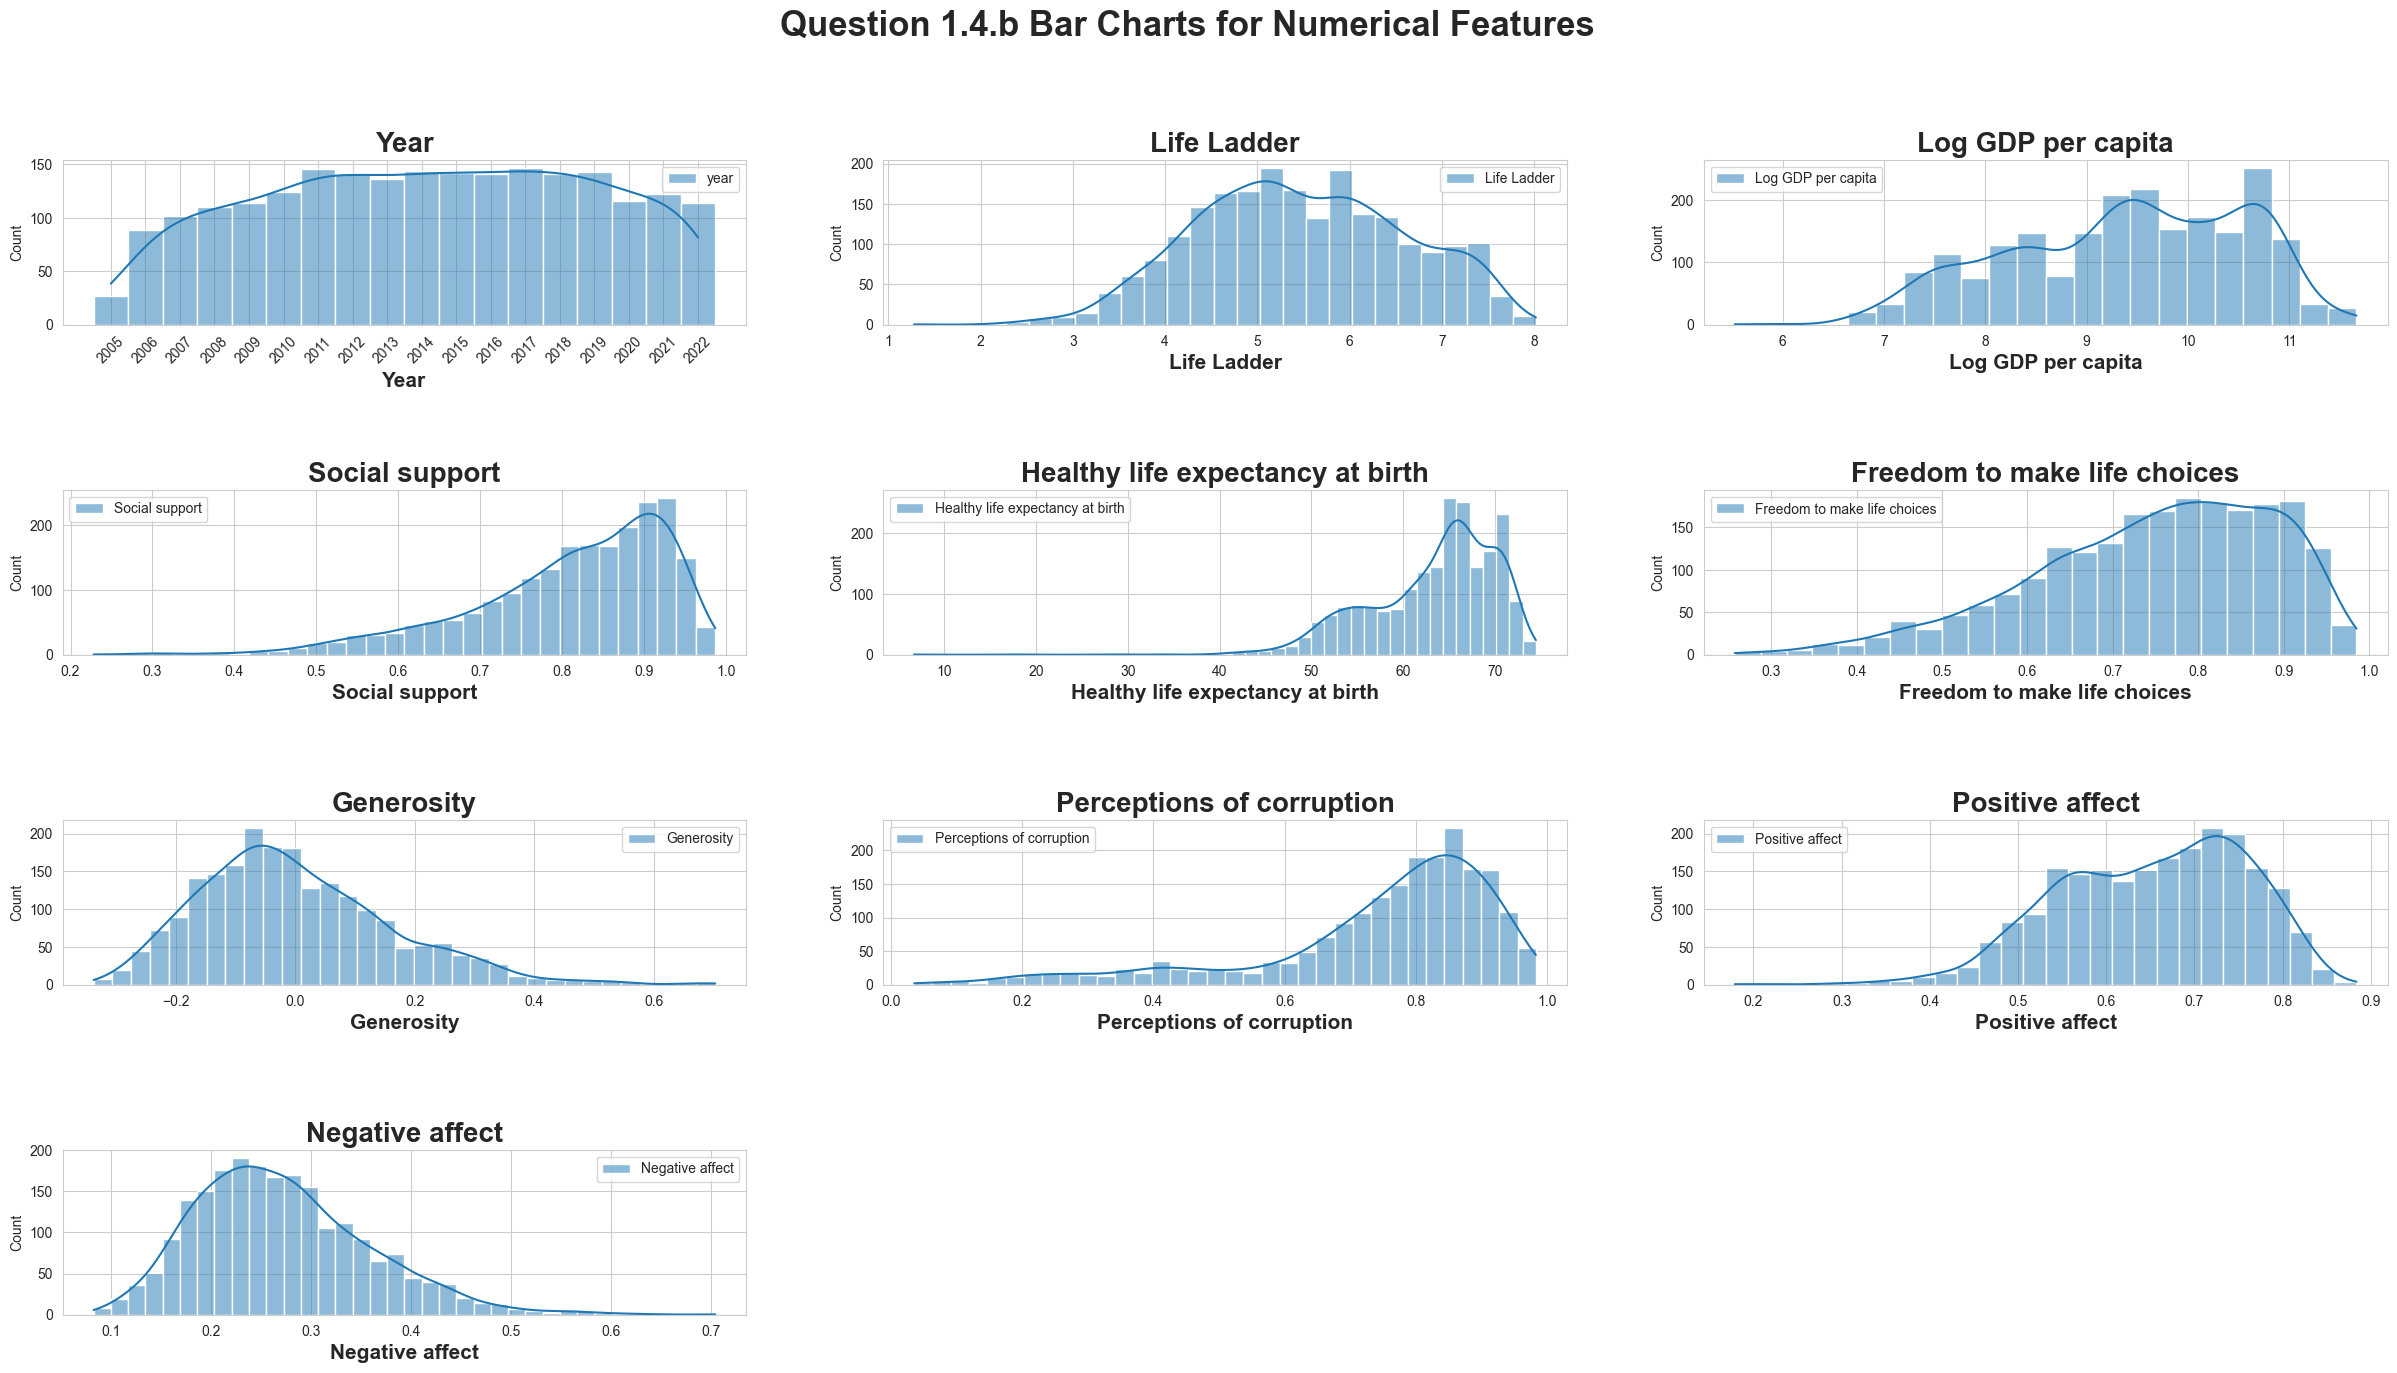

In [12]:
# 1.4.b Bar Chart
figure, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 15))  # since we have 10 features
figure.suptitle("Question 1.4.b Bar Charts for Numerical Features", fontweight="bold", fontsize=25)

# increase spacing between subplot rows so that subtitles can fit and increase size
plt.subplots_adjust(hspace=1.0)
plt.tick_params(labelsize=15)

# show whole numbered bins for clarity.
sns.histplot(data=whr_data_frame[["year"]], ax=axes[0, 0], kde=True, discrete=True, binwidth=2, bins=9)
axes[0, 0].set_title("Year", fontweight="bold", fontsize=20)
axes[0, 0].set_xlabel("Year", fontweight="bold", fontsize=15)
axes[0, 0].set_xticks(range(2005, 2023))
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

sns.histplot(data=whr_data_frame[["Life Ladder"]], ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Life Ladder", fontweight="bold", fontsize=20)
axes[0, 1].set_xlabel("Life Ladder", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Log GDP per capita"]], ax=axes[0, 2], kde=True)
axes[0, 2].set_title("Log GDP per capita", fontweight="bold", fontsize=20)
axes[0, 2].set_xlabel("Log GDP per capita", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Social support"]], ax=axes[1, 0], kde=True)
axes[1, 0].set_title("Social support", fontweight="bold", fontsize=20)
axes[1, 0].set_xlabel("Social support", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Healthy life expectancy at birth"]], ax=axes[1, 1], kde=True)
axes[1, 1].set_title("Healthy life expectancy at birth", fontweight="bold", fontsize=20)
axes[1, 1].set_xlabel("Healthy life expectancy at birth", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Freedom to make life choices"]], ax=axes[1, 2], kde=True)
axes[1, 2].set_title("Freedom to make life choices", fontweight="bold", fontsize=20)
axes[1, 2].set_xlabel("Freedom to make life choices", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Generosity"]], ax=axes[2, 0], kde=True)
axes[2, 0].set_title("Generosity", fontweight="bold", fontsize=20)
axes[2, 0].set_xlabel("Generosity", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Perceptions of corruption"]], ax=axes[2, 1], kde=True)
axes[2, 1].set_title("Perceptions of corruption", fontweight="bold", fontsize=20)
axes[2, 1].set_xlabel("Perceptions of corruption", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Positive affect"]], ax=axes[2, 2], kde=True)
axes[2, 2].set_title("Positive affect", fontweight="bold", fontsize=20)
axes[2, 2].set_xlabel("Positive affect", fontweight="bold", fontsize=15)

sns.histplot(data=whr_data_frame[["Negative affect"]], ax=axes[3, 0], kde=True)
axes[3, 0].set_title("Negative affect", fontweight="bold", fontsize=20)
axes[3, 0].set_xlabel("Negative affect", fontweight="bold", fontsize=15)

# only 10 features, don't show the remaining axes
axes[3, 1].axis("off")
axes[3, 2].axis("off")

plt.show()

In [21]:
# 1.4.c - Remove outliers and get metrics + bar charts

# remove outliers
feature = "Life Ladder"
life_ladder_no_outliers_df = whr_data_frame[whr_data_frame[feature] >= 2][feature]

feature = "Log GDP per capita"
log_per_capita_no_outliers_df = whr_data_frame[whr_data_frame[feature] >= 6][feature]

feature = "Social support"
social_support_no_outliers_df = whr_data_frame[whr_data_frame[feature] >= 0.52][feature]

feature = "Healthy life expectancy at birth"
healthy_life_expectancy_at_birth_no_outliers_df = whr_data_frame[whr_data_frame[feature] >= 47][feature]

feature = "Freedom to make life choices"
freedom_to_make_life_choices_no_outliers_df = whr_data_frame[whr_data_frame[feature] >= 0.47][feature]

feature = "Generosity"
generosity_no_outliers_df = whr_data_frame[whr_data_frame[feature] <= 0.4][feature]

feature = "Perceptions of corruption"
perceptions_of_corruption_no_outliers_df = whr_data_frame[whr_data_frame[feature] >= 0.43][feature]

feature = "Positive affect"
positive_affect_no_outliers_df = whr_data_frame[whr_data_frame[feature] >= 0.33][feature]

feature = "Negative affect"
negative_affect_no_outliers_df = whr_data_frame[whr_data_frame[feature] <= 0.49][feature]

# Get skewness + kurtosis from data with removed outliers:

print("---------------------------------------------------------------------\n"
      " Skewness and Kurtosis for Numerical Features AFTER removing outliers\n"
      "---------------------------------------------------------------------\n")
life_ladder_no_outliers_skewness = life_ladder_no_outliers_df.skew()
life_ladder_no_outliers_kurtosis = life_ladder_no_outliers_df.kurt()

print("%-35s  ||  Skewness:  %3.3f  ||  Kurtosis:  %3.3f" %
      ("Life Ladder", life_ladder_no_outliers_skewness, life_ladder_no_outliers_kurtosis))

log_per_capita_no_outliers_skewness = log_per_capita_no_outliers_df.skew()
log_per_capita_no_outliers_kurtosis = log_per_capita_no_outliers_df.kurt()

print("%-35s  ||  Skewness:  %3.3f  ||  Kurtosis:  %3.3f" %
      ("Log GDP per capita", log_per_capita_no_outliers_skewness, log_per_capita_no_outliers_kurtosis))


social_support_no_outliers_skewness = social_support_no_outliers_df.skew()
social_support_no_outliers_kurtosis = social_support_no_outliers_df.kurt()

print("%-35s  ||  Skewness:  %3.3f  ||  Kurtosis:  %3.3f" %
      ("Social support", social_support_no_outliers_skewness, social_support_no_outliers_kurtosis))


healthy_life_expectancy_at_birth_no_outliers_skewness = healthy_life_expectancy_at_birth_no_outliers_df.skew()
healthy_life_expectancy_at_birth_no_outliers_kurtosis = healthy_life_expectancy_at_birth_no_outliers_df.kurt()

print("%-35s  ||  Skewness:  %3.3f  ||  Kurtosis:  %3.3f" %
      ("Healthy life expectancy at birth",
       healthy_life_expectancy_at_birth_no_outliers_skewness,
       healthy_life_expectancy_at_birth_no_outliers_kurtosis))


freedom_to_make_life_choices_no_outliers_skewness = freedom_to_make_life_choices_no_outliers_df.skew()
freedom_to_make_life_choices_no_outliers_kurtosis = freedom_to_make_life_choices_no_outliers_df.kurt()

print("%-35s  ||  Skewness:  %3.3f  ||  Kurtosis:  %3.3f" %
      ("Freedom to make life choices",
       freedom_to_make_life_choices_no_outliers_skewness,
       freedom_to_make_life_choices_no_outliers_kurtosis))


generosity_no_outliers_skewness = generosity_no_outliers_df.skew()
generosity_no_outliers_kurtosis = generosity_no_outliers_df.kurt()

print("%-35s  ||  Skewness:  %3.3f  ||  Kurtosis:  %3.3f" %
      ("Generosity",
       generosity_no_outliers_skewness,
       generosity_no_outliers_kurtosis))


perceptions_of_corruption_no_outliers_skewness = perceptions_of_corruption_no_outliers_df.skew()
perceptions_of_corruption_no_outliers_kurtosis = perceptions_of_corruption_no_outliers_df.kurt()

print("%-35s  ||  Skewness:  %3.3f  ||  Kurtosis:  %3.3f" %
      ("Perceptions of corruption",
       perceptions_of_corruption_no_outliers_skewness,
       perceptions_of_corruption_no_outliers_kurtosis))


positive_affect_no_outliers_skewness = positive_affect_no_outliers_df.skew()
positive_affect_no_outliers_kurtosis = positive_affect_no_outliers_df.kurt()

print("%-35s  ||  Skewness:  %3.3f  ||  Kurtosis:  %3.3f" %
      ("Positive affect",
       positive_affect_no_outliers_skewness,
       positive_affect_no_outliers_kurtosis))


negative_affect_no_outliers_skewness = negative_affect_no_outliers_df.skew()
negative_affect_no_outliers_kurtosis = negative_affect_no_outliers_df.kurt()

print("%-35s  ||  Skewness:  %3.3f  ||  Kurtosis:  %3.3f" %
      ("Negative affect",
       negative_affect_no_outliers_skewness,
       negative_affect_no_outliers_kurtosis))


---------------------------------------------------------------------
 Skewness and Kurtosis for Numerical Features AFTER removing outliers
---------------------------------------------------------------------

Life Ladder                          ||  Skewness:  0.001  ||  Kurtosis:  -0.652
Log GDP per capita                   ||  Skewness:  -0.312  ||  Kurtosis:  -0.845
Social support                       ||  Skewness:  -0.788  ||  Kurtosis:  -0.129
Healthy life expectancy at birth     ||  Skewness:  -0.631  ||  Kurtosis:  -0.523
Freedom to make life choices         ||  Skewness:  -0.363  ||  Kurtosis:  -0.756
Generosity                           ||  Skewness:  0.431  ||  Kurtosis:  -0.320
Perceptions of corruption            ||  Skewness:  -0.938  ||  Kurtosis:  0.596
Positive affect                      ||  Skewness:  -0.328  ||  Kurtosis:  -0.623
Negative affect                      ||  Skewness:  0.394  ||  Kurtosis:  -0.355


# 1.5 Are there any interesting correlations in the data?
To evaluate this question, a correlation matrix is used to assess any bi-variate relationships between the features.
**See header **1.5 Calculation.**

When inspecting the correlation matrix heatmap, I considered correlations at `0.8+` to be as strong correlations. Any correlation between `0.6 and 0.8` are considered to be a weak correlations. Any correlations that have significantly less 0.6 will **not** be considered to have a significant correlation.

For each of the features, I annotate weak and strong correlations below:
__Life Ladder__
* `Life Ladder`'s correlations with:
  * `Log GDP per captia` is **0.78** and is a weak correlation.
  * `Social support` is **0.72** and is a weak correlation.
  * `Healthy Life Expectancy at Birth` is **0.71** and is a weak correlation.

-------------------------------------------------------------------------------
__Log GDP per Capita__
* `Log GDP per Capita`'s correlations with:
  * `Life Ladder` is **0.78** and is a weak correlation.
  * `Social support` is **0.68** and is a weak correlation.
  * `Healthy Life Expectancy at Birth` is **0.82** and is a strong correlation.

-------------------------------------------------------------------------------
__Social Support__
* `Social support`'s correlations with:
  * `Life Ladder` is **0.72** and is a weak correlation.
  * `Log GDP per capita` is **0.68** and is a weak correlation.
  * `Healthy Life Expectancy at Birth` is **0.60** and is a weak correlation.
-------------------------------------------------------------------------------
__Healthy Life Expectancy at Birth__
* `Healthy Life Expectancy at Birth`'s correlations with:
  * `Life Ladder` is **0.71** and is a weak correlation.
  * `Log GDP per capita` is **0.82** and is a strong correlation.
  * `Social Support` is **0.60** and is a weak correlation.
-------------------------------------------------------------------------------
__Really weak correlation that was observed__
* I observed a correlation of **0.58** between `Freedom to make life choices` and `Positive affect`. While a correlation of 0.58 falls below the threshold of **0.6** to be considered a weak correlation, it is possible that a very weak correlation exists here since its value is close to the 0.6 threshold.
-------------------------------------------------------------------------------


## 1.5 Calculations

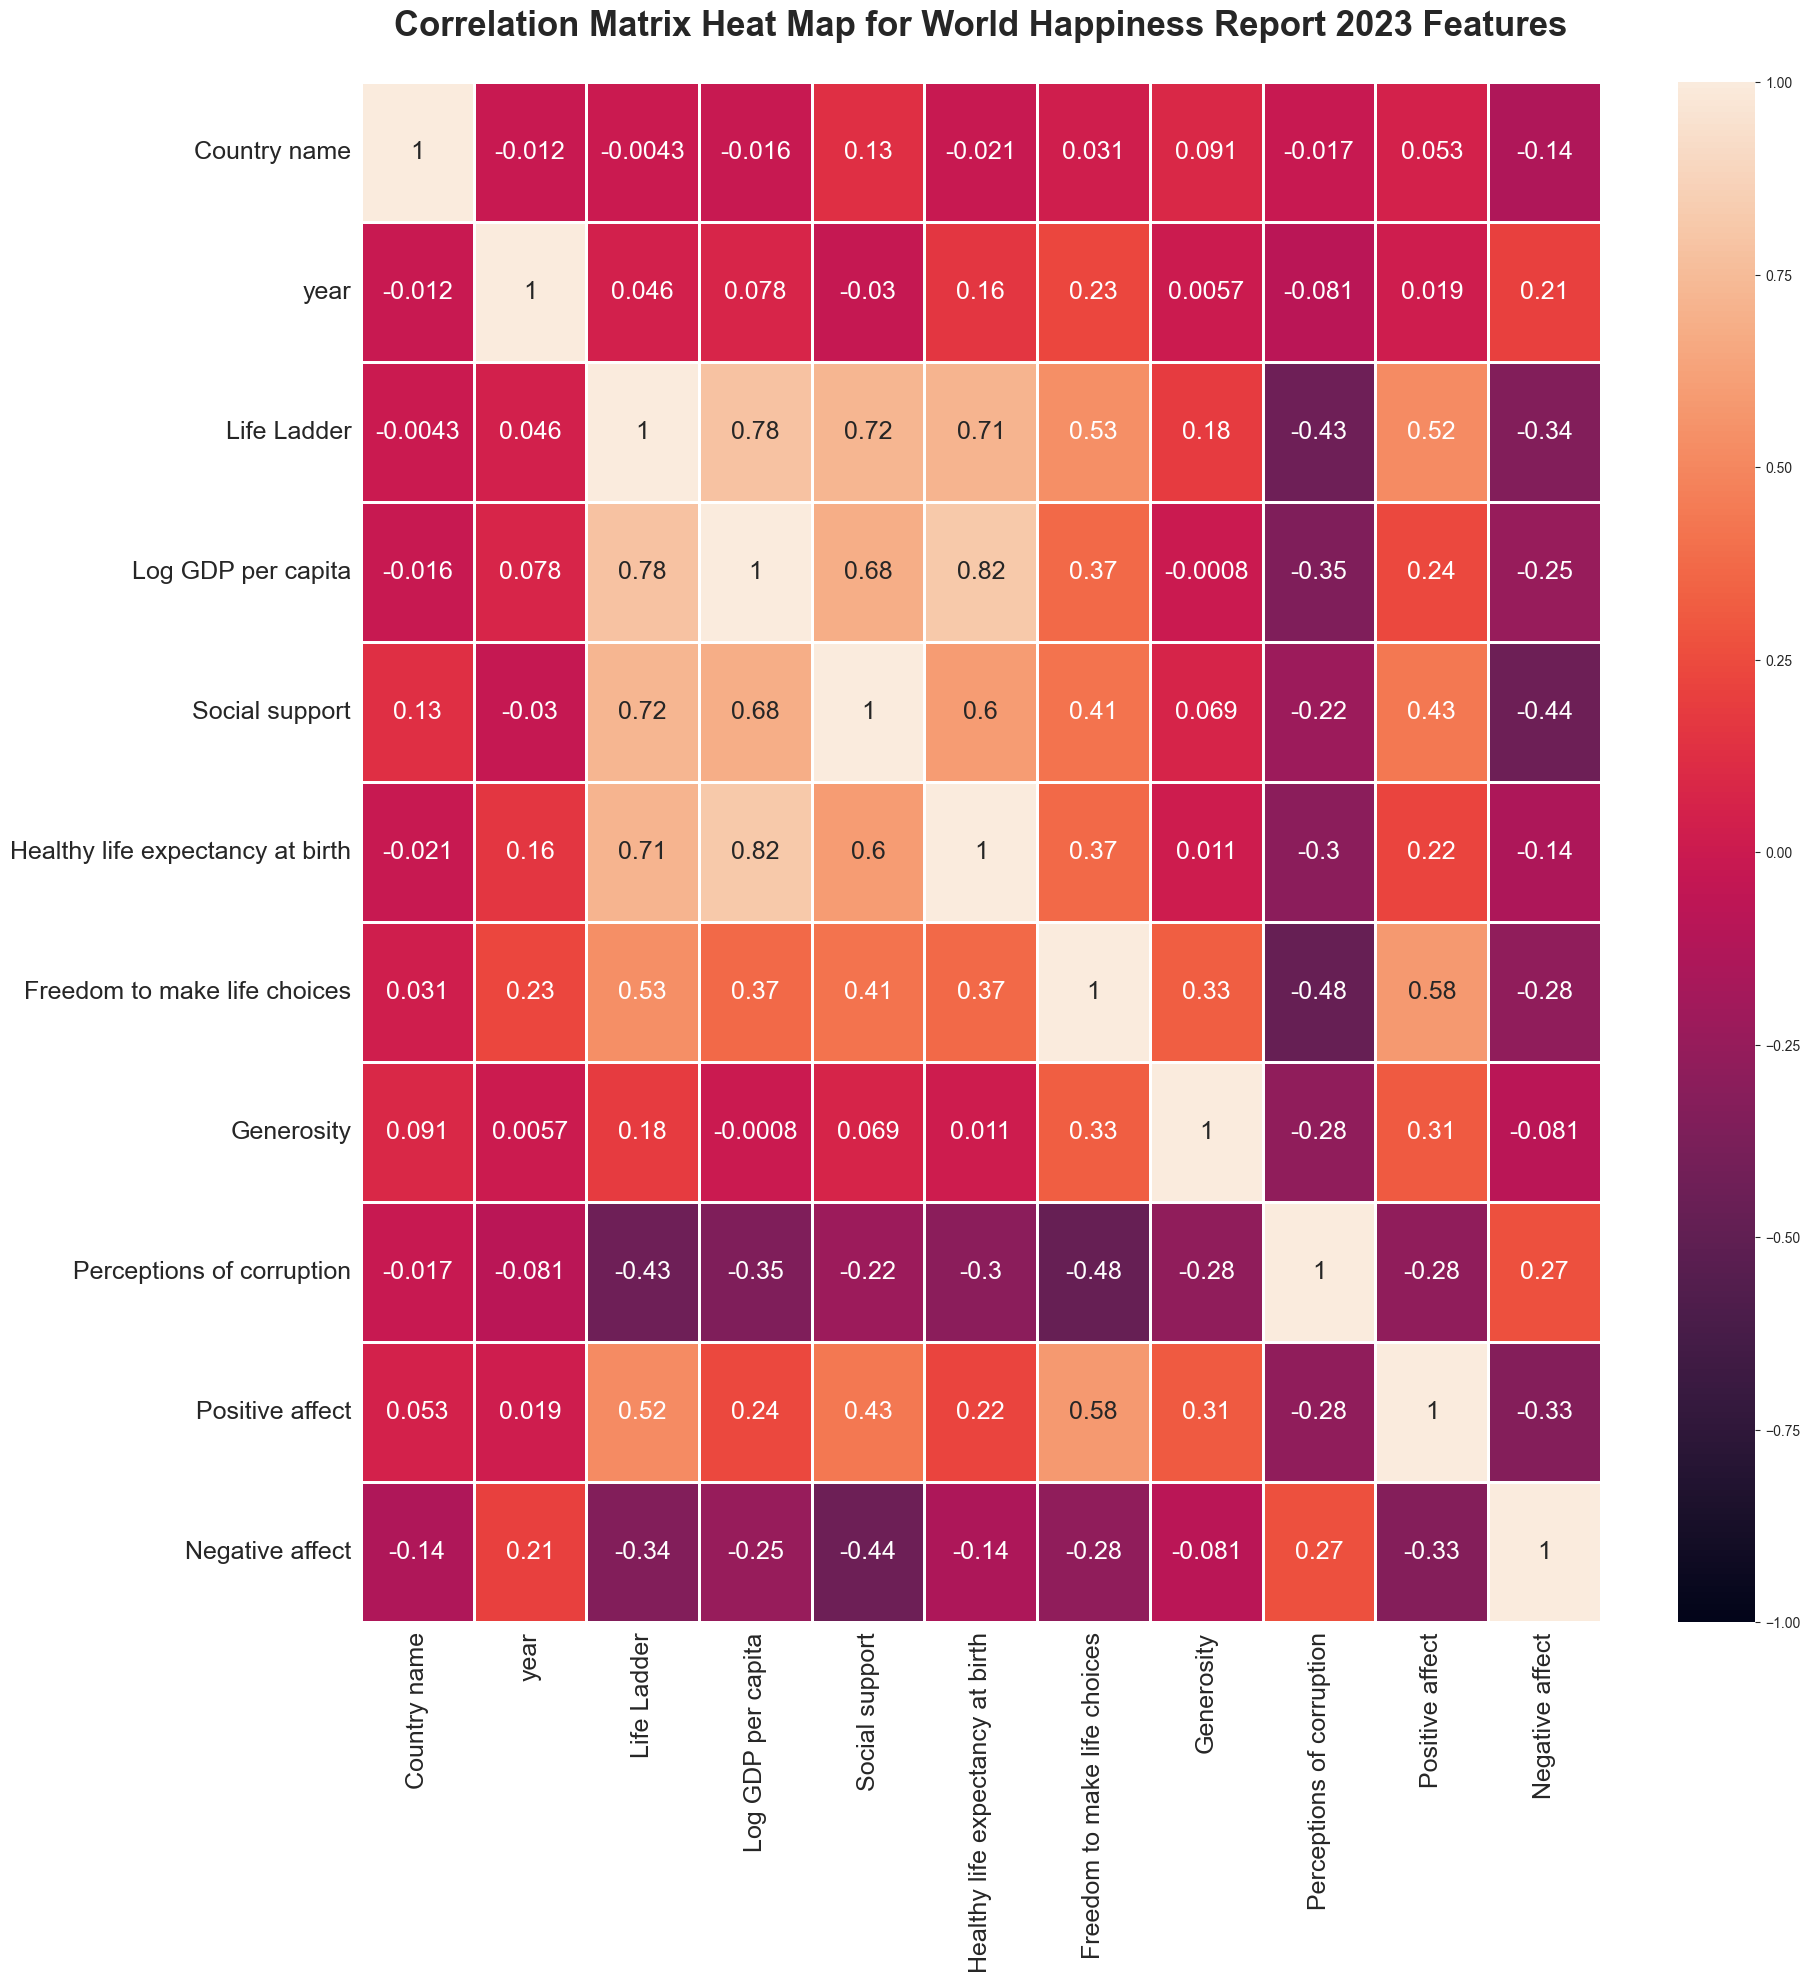

In [14]:
# 1.5 Correlation Matix Heatmap
# Serialize country name strings into numbers so that correlations can be made on them.
whr_data_frame['Country name'] = LabelEncoder().fit_transform(whr_data_frame['Country name'])
corr_matrix = whr_data_frame.corr()
plt.figure(figsize=(20, 20))
axis = sns.heatmap(corr_matrix,
            annot=True,
            linewidths=1.0,
            vmin=-1.0,
            vmax=1.0,
            annot_kws={
                "fontsize": 18
            })

axis.set_xticklabels(axis.get_xticklabels(), fontsize=18)
axis.set_yticklabels(axis.get_yticklabels(), fontsize=18)
plt.title("Correlation Matrix Heat Map for World Happiness Report 2023 Features\n",
          fontsize=25,
          fontweight="bold")
plt.show()

# 1.6 Can you identify any limitations, missing values or distortions of the data?
See the header **1.6 Calculations** below this response header.
__Limitations__
1.6.a - The dataset has a few outliers that were identified using box plots. **See Question 1.1 for the box plot figure**
  * The following features have **a few** outliers:
    * Life Ladder, Log GDP per Capita, positive affect.
  * The following feature have **many** outliers:
    * Social Support, Healthy Life Expectancy at Birth, Freedom to make life choices, Generosity, Perceptions of corruption, Negative affect.
__Missing Values__
1.6.b - The dataset has missing values. **Question 1.1.b**
```
----------------------------------------------
  Features and their missing values
----------------------------------------------

year                                ||   Num Missing:  0.00  || Percent Missing:  0.00
Life Ladder                         ||   Num Missing:  0.00  || Percent Missing:  0.00
Log GDP per capita                  ||   Num Missing:  20.00  || Percent Missing:  0.91
Social support                      ||   Num Missing:  13.00  || Percent Missing:  0.59
Healthy life expectancy at birth    ||   Num Missing:  54.00  || Percent Missing:  2.46
Freedom to make life choices        ||   Num Missing:  33.00  || Percent Missing:  1.50
Generosity                          ||   Num Missing:  73.00  || Percent Missing:  3.32
Perceptions of corruption           ||   Num Missing:  116.00  || Percent Missing:  5.28
Positive affect                     ||   Num Missing:  24.00  || Percent Missing:  1.09
Negative affect                     ||   Num Missing:  16.00  || Percent Missing:  0.73
```
__Distortions__
Except for `Country name` and `Negative affect`, the other features have outliers and have skewed the results with tails in areas consistent with their outliers.

# 1.6 Calculations

In [15]:
# 1.6.a - See 1.1.a Box Plots
# 1.6.b - See 1.1.b Missing Values
print_features_missing_values(data_frame=whr_data_frame, features=features)


----------------------------------------------
  Features and their missing values 
----------------------------------------------

year                                ||   Num Missing:  0.00  || Percent Missing:  0.00
Life Ladder                         ||   Num Missing:  0.00  || Percent Missing:  0.00
Log GDP per capita                  ||   Num Missing:  20.00  || Percent Missing:  0.91
Social support                      ||   Num Missing:  13.00  || Percent Missing:  0.59
Healthy life expectancy at birth    ||   Num Missing:  54.00  || Percent Missing:  2.46
Freedom to make life choices        ||   Num Missing:  33.00  || Percent Missing:  1.50
Generosity                          ||   Num Missing:  73.00  || Percent Missing:  3.32
Perceptions of corruption           ||   Num Missing:  116.00  || Percent Missing:  5.28
Positive affect                     ||   Num Missing:  24.00  || Percent Missing:  1.09
Negative affect                     ||   Num Missing:  16.00  || Percent Miss

# 1.7 What would you like to see in this dataset?
* I would like to see the data with either complete set of entries (or removed of null entries for all rows).
* I would like to ensure the data for Healthy Life Expectancy assessed with real values vs. extrapolated / interpolated. If this data cannot be provided, maybe evaluation and assessment for this feature (or period of evaluation) should be omitted.
* I would like to see updated documentation for the `Generosity` feature in order to understand this feature with certainty, and not just with an assumption.
* I would like to see outliers removed from the data.
* I would also like to see a **continent column** so that countries can also be grouped by continent for evaluation.

# Question 2
See header **2.1 Calculations** below this response header.
* To answer this question, I cite the following reference from `https://worldhappiness.report/data/` to provide responses:
    * Statistical Appendix for "World happiness, trust and social connections in times of crisis", Chapter 2 of World Happiness Report 2023 by John F. Helliwell, Haifang Huang, Max Norton, Shun Wang and Leonard Goff - March 13, 2023
* The happiest country for the respecive year was determined by first selecting only those countries in the year 2022 and then grouping those countries by their `Positive affect`.
  * I chose this attribute to evaluate happiness because the description in the World Happiness Report's appendix states that this feature is an average score to (0/1) boolean responses to the following questions regarding where or not a person was: (1) smiling or laughing yesterday, (2) experiencing laughter and smiling for the majority of the day, and (3) learning something interesting yesterday.
  * I consider these to be a direct indicator of happiness.

* I then select the country with the highest average and graph the top 10 for visual inspection.

## 2.1.a - What is the happiest country in 2023?
* There is no data for **2023** in the dataset. From `whr_data_frame.describe()` the maximum recoded year was 2022. I provide a response for **2022** which is the maximum year that was reported for the 2023 World Happiness Report.

* **See Bar Chart in 2.1 Calculations**
* The `Top 10 Happiest Countries` in **2022** are:
```
                  Positive affect
Country name
Guatemala            0.834880
El Salvador          0.822725
Paraguay             0.820757
Panama               0.820656
Indonesia            0.818229
Mexico               0.817900
Senegal              0.812712
Costa Rica           0.793032
Nicaragua            0.787344
Denmark              0.786820
```
* Guatemala is the happiest country in **2022** when using `Positive Affect`as an indicator for happiness.

## 2.1.b - In 2013?
* The `Top 10 Happiest Countries` in **2013** are:
```
                 Positive affect
Country name
Paraguay             0.873761
Panama               0.859787
Denmark              0.825601
Ecuador              0.823897
Guatemala            0.822217
Colombia             0.814824
Venezuela            0.812144
Costa Rica           0.808915
Iceland              0.802266
El Salvador          0.801008
```
* Paraguay is the happiest country in **2013** when using `Positive Affect`as an indicator for happiness.

## 2.1.c - Of all time?
* To find this, I utilize all the years since an average spanning across all the years vs. a single year. My thinking is that one country may have had a great year a certain year but if the remaining other years have a low Positive effect, then it cannot be in a domain of the "Happiest of all time" where I consider "all time" to be the entire domain of the years.
* The `Top 10 Happiest Countries` in **all time** are:
```

```

## 2.2 - What is the least happy country in 2023, 2013 and of all time?

# 2.1 Calculations

In [16]:
# 2.1.a - PART 1. There is no data for 2023, the max is 2022.
whr_data_frame.describe()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,82.770805,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,47.881120,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,0.000000,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,42.000000,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,81.000000,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,124.000000,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,164.000000,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


              Positive affect
Country name                 
56                   0.834880
44                   0.822725
115                  0.820757
114                  0.820656
65                   0.818229
96                   0.817900
125                  0.812712
34                   0.793032
107                  0.787344
39                   0.786820


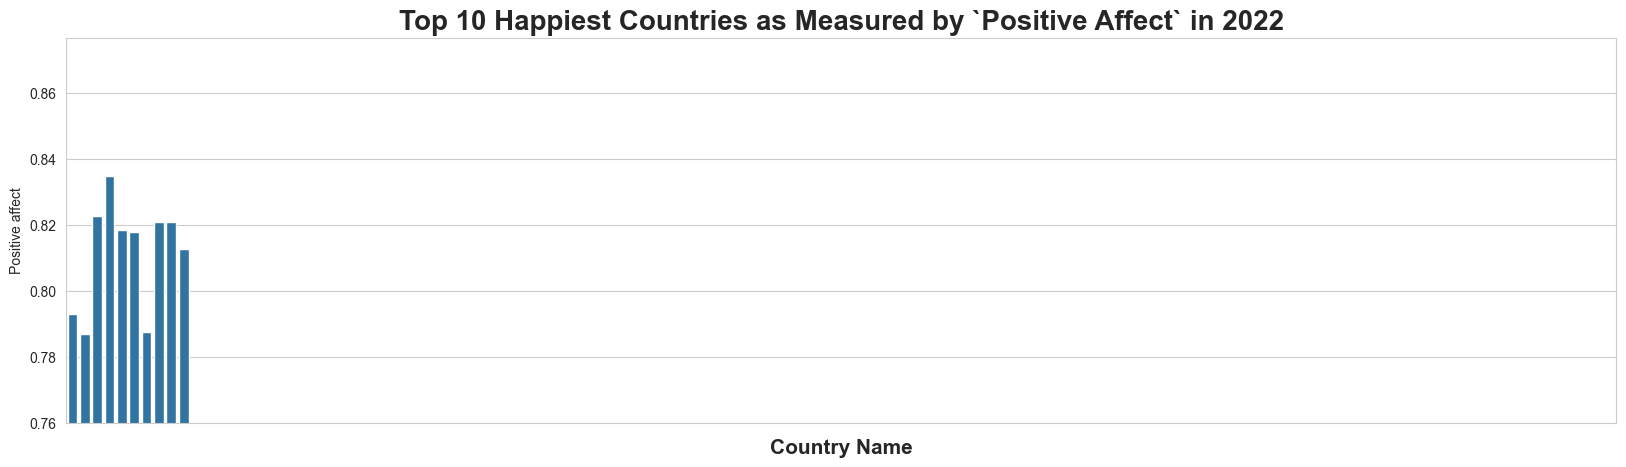

In [17]:
# 2.1.a - PART 2.
# Get the happiest country for 2022
happy_countries_data_frame = whr_data_frame[["Country name", "year", "Positive affect"]]
unhappy_countries_data_frame = whr_data_frame[["Country name", "year", "Negative affect"]]

# Extract the rows from 2022 and group data by Positive affect.
countries_data_frame_2022 = happy_countries_data_frame[happy_countries_data_frame["year"] == 2022]
countries_grouped_by_name_2022 = countries_data_frame_2022.groupby(by=["Country name"], dropna=True)
average_happiness_by_country_2022 = countries_grouped_by_name_2022['Positive affect'].mean().to_frame()

average_happiness_by_country_2022 = average_happiness_by_country_2022.sort_values(by="Positive affect", ascending=False)
happiness_top_10_2022 = average_happiness_by_country_2022.head(10)
print(happiness_top_10_2022)
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

sns.barplot(data=happiness_top_10_2022["Positive affect"])
plt.title("Top 10 Happiest Countries as Measured by `Positive Affect` in 2022", fontweight="bold", fontsize=20)

axes.set_xlabel("Country Name", fontweight="bold", fontsize=15)
axes.set_xticks(list(happiness_top_10_2022.index))
axes.set_xticklabels(labels=axes.get_xticklabels(), rotation=45)

# Truncate the minimum values so that we can focus on the differences.
plt.ylim(0.76)
plt.show()

              Positive affect
Country name                 
115                  0.873761
114                  0.859787
39                   0.825601
42                   0.823897
56                   0.822217
30                   0.814824
160                  0.812144
34                   0.808915
63                   0.802266
44                   0.801008


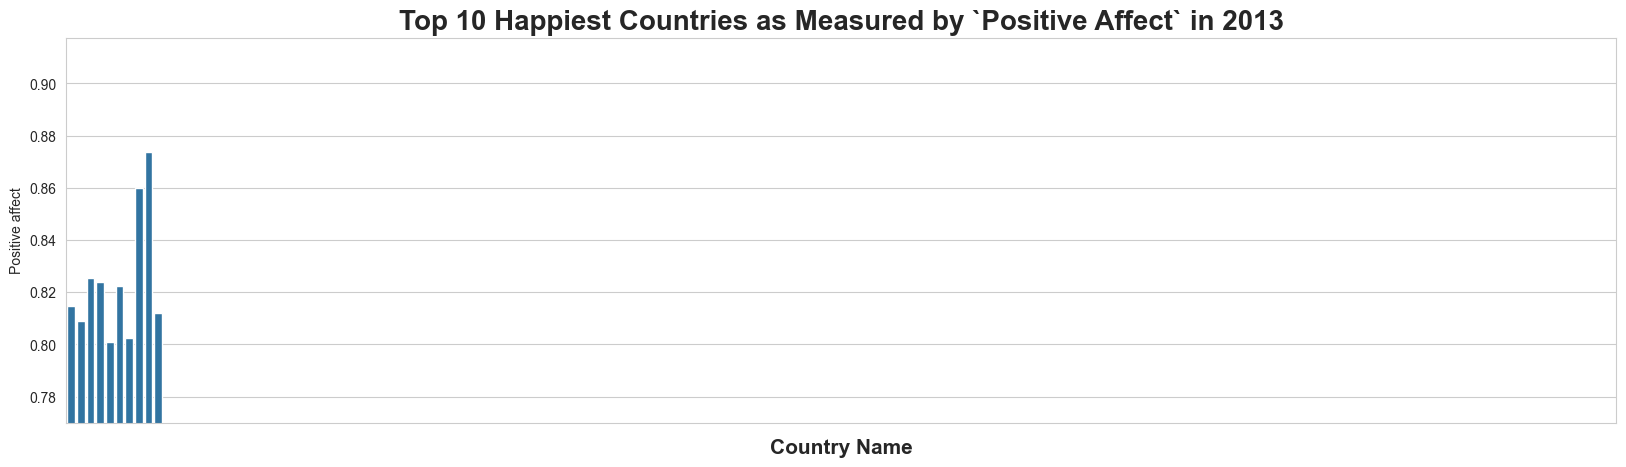

In [18]:
# 2.1.b - Happiest country 2013
# Extract the rows from 2013 and group data by Positive affect.
countries_data_frame_2013 = happy_countries_data_frame[happy_countries_data_frame["year"] == 2013]
countries_grouped_by_name_2013 = countries_data_frame_2013.groupby(by=["Country name"], dropna=True)
average_happiness_by_country_2013 = countries_grouped_by_name_2013['Positive affect'].mean().to_frame()

average_happiness_by_country_2013 = average_happiness_by_country_2013.sort_values(by="Positive affect", ascending=False)
happiness_top_10_2013 = average_happiness_by_country_2013.head(10)
print(happiness_top_10_2013)
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

sns.barplot(data=happiness_top_10_2013["Positive affect"])
plt.title("Top 10 Happiest Countries as Measured by `Positive Affect` in 2013", fontweight="bold", fontsize=20)

axes.set_xlabel("Country Name", fontweight="bold", fontsize=15)
axes.set_xticks(list(happiness_top_10_2013.index))
axes.set_xticklabels(labels=axes.get_xticklabels(), rotation=45)

# Truncate the minimum values so that we can focus on the differences.
plt.ylim(0.77)
plt.show()

              Positive affect
Country name                 
114                  0.821388
115                  0.817601
44                   0.812625
56                   0.811884
34                   0.807789
63                   0.806559
42                   0.791851
147                  0.786186
30                   0.785292
117                  0.784309


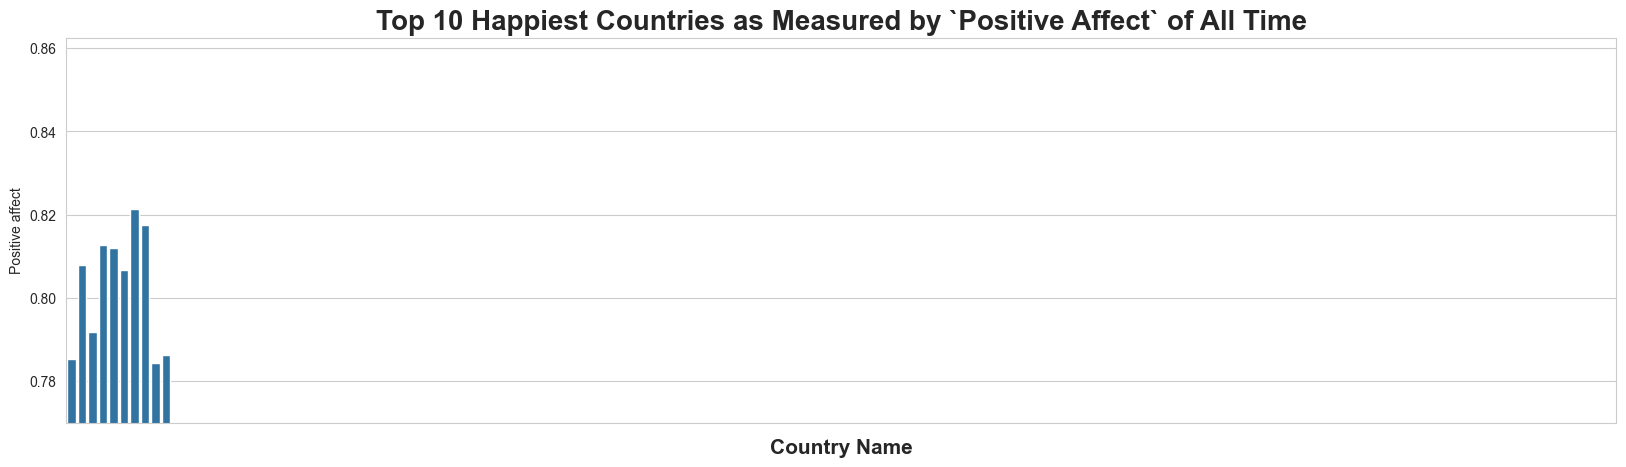

In [19]:
# 2.1.c Happiest Country of All Time
countries_grouped_by_name_all_time = happy_countries_data_frame.groupby(by=["Country name"], dropna=True)
average_happiness_by_country_all_time = countries_grouped_by_name_all_time['Positive affect'].mean().to_frame()

average_happiness_by_country_all_time = average_happiness_by_country_all_time.sort_values(by="Positive affect", ascending=False)
happiness_top_10_all_time = average_happiness_by_country_all_time.head(10)
print(happiness_top_10_all_time)
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

sns.barplot(data=happiness_top_10_all_time["Positive affect"])
plt.title("Top 10 Happiest Countries as Measured by `Positive Affect` of All Time", fontweight="bold", fontsize=20)

axes.set_xlabel("Country Name", fontweight="bold", fontsize=15)
axes.set_xticks(list(happiness_top_10_all_time.index))
axes.set_xticklabels(labels=axes.get_xticklabels(), rotation=45)

# Truncate the minimum values so that we can focus on the differences.
plt.ylim(0.77)
plt.show()